In [143]:
import pandas as pd
import numpy as np
from sklearn.cluster import k_means
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df = pd.read_csv(r"C:\Users\asus\Downloads\k_means.csv")
df.sample(20)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
5212,5213,video,4/26/2018 1:04,303,604,291,198,100,3,1,1,0,NaN,NaN,NaN,NaN
6233,6234,photo,5/23/2018 1:10,1627,30,3,1607,17,3,0,0,0,NaN,NaN,NaN,NaN
6872,6873,status,8/21/2017 1:57,34,8,0,32,2,0,0,0,0,NaN,NaN,NaN,NaN
1021,1022,status,11/8/2015 7:21,987,13,1,987,0,0,0,0,0,NaN,NaN,NaN,NaN
1187,1188,photo,6/4/2015 22:40,2074,22,1,2074,0,0,0,0,0,NaN,NaN,NaN,NaN
829,830,photo,4/3/2016 7:27,280,9,0,279,0,1,0,0,0,NaN,NaN,NaN,NaN
2296,2297,photo,9/13/2012 3:39,14,1,0,14,0,0,0,0,0,NaN,NaN,NaN,NaN
1179,1180,video,6/10/2015 9:00,2259,5,8,2259,0,0,0,0,0,NaN,NaN,NaN,NaN
4436,4437,video,11/9/2017 4:41,103,330,152,84,17,0,1,0,1,NaN,NaN,NaN,NaN
4188,4189,video,1/20/2018 7:41,1,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN


In [145]:
len(df.status_id.unique())

7050

In [146]:
len(df[df["status_type"] == "video"])

2334

In [147]:
df[df["status_published"] =="4/19/2018 22:26"]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
4592,4593,photo,4/19/2018 22:26,383,5,6,379,2,2,0,0,0,NaN,NaN,NaN,NaN


In [148]:
df[df["status_published"] =="7/15/2017 10:52"]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6977,6978,video,7/15/2017 10:52,253,4432,167,209,29,5,5,5,0,NaN,NaN,NaN,NaN


In [149]:
df.drop(columns= ["Column1", "Column2", "Column3", "Column4"], inplace = True)

In [150]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [151]:
df.isna().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [152]:
df.dtypes

status_id            int64
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

In [153]:
df.status_published.nunique()

6913

In [154]:
df.drop(columns= "status_published", inplace=True)

In [155]:
df

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,529,512,262,432,92,3,1,1,0
1,2,photo,150,0,0,150,0,0,0,0,0
2,3,video,227,236,57,204,21,1,1,0,0
3,4,photo,111,0,0,111,0,0,0,0,0
4,5,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,89,0,0,89,0,0,0,0,0
7046,7047,photo,16,0,0,14,1,0,1,0,0
7047,7048,photo,2,0,0,1,1,0,0,0,0
7048,7049,photo,351,12,22,349,2,0,0,0,0


In [185]:
X = df.drop(columns = ["status_type","status_id" ])

In [186]:
X

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


In [187]:
y = df["status_type"]

In [188]:
from sklearn.preprocessing import LabelEncoder

In [189]:
# y.columns()

In [190]:
le = LabelEncoder()

In [191]:
y

0       video
1       photo
2       video
3       photo
4       photo
        ...  
7045    photo
7046    photo
7047    photo
7048    photo
7049    photo
Name: status_type, Length: 7050, dtype: object

In [192]:
# col_tar = y.columns.tolist()

In [193]:
y = le.fit_transform(y)

In [194]:
y

array([3, 1, 3, ..., 1, 1, 1])

In [195]:
col = X.columns.tolist()

In [196]:
from sklearn.preprocessing import MinMaxScaler

In [197]:
ms = MinMaxScaler()

In [198]:
X = ms.fit_transform(X)

In [199]:
X = pd.DataFrame(X, columns = col)

In [200]:
X

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


In [201]:
from sklearn.cluster import KMeans



In [224]:
kmeans = KMeans(n_clusters=6,init="k-means++",n_init = 10, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=6, n_init=10, random_state=0)

In [225]:
kmeans.cluster_centers_



array([[ 1.00069797e-02,  1.30752773e-03,  1.90259418e-03,
         9.53048754e-03,  2.67695644e-03,  8.90355166e-04,
         9.28901613e-04,  1.34240449e-03,  7.51403164e-04],
       [ 4.91967080e-01,  3.09646714e-03,  3.82683785e-03,
         4.90718366e-01,  5.11541057e-03,  8.28821479e-03,
         1.24761967e-03,  4.04285426e-04, -1.21430643e-17],
       [ 2.47870149e-01,  6.73430966e-03,  1.11773877e-02,
         2.44207926e-01,  2.02508869e-02,  1.08582279e-02,
         4.33310444e-03,  2.47831475e-03,  3.83739057e-03],
       [ 2.96518503e-01,  1.34622734e-01,  2.23206210e-01,
         2.27169372e-01,  4.02088346e-01,  1.57731879e-01,
         8.97198822e-02,  4.59624710e-02,  7.04127645e-02],
       [ 5.97976112e-02,  8.62118625e-02,  7.76340481e-02,
         4.22811279e-02,  1.15746871e-01,  6.18907335e-03,
         2.12239598e-02,  1.81260553e-02,  1.51369125e-02],
       [ 7.21849025e-02,  4.97311232e-03,  4.38468396e-03,
         6.95868468e-02,  1.38419019e-02,  5.650540

In [226]:
kmeans.inertia_


45.19374091417737

In [227]:
labels = kmeans.labels_
labels

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 320 out of 7050 samples were correctly labeled.


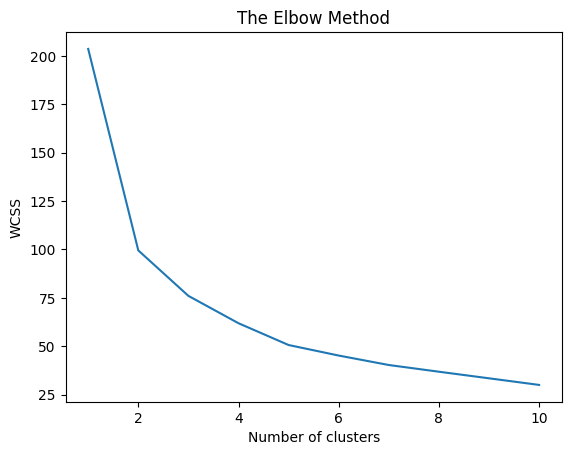

In [228]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [229]:
y

array([3, 1, 3, ..., 1, 1, 1])

In [234]:
from sklearn.metrics import adjusted_rand_score

# Calculate adjusted Rand index
ari = adjusted_rand_score(df['status_type'], labels)
print('Adjusted Rand index:', ari)


Adjusted Rand index: 0.15709281951847318


In [236]:
df["cluster"] = labels

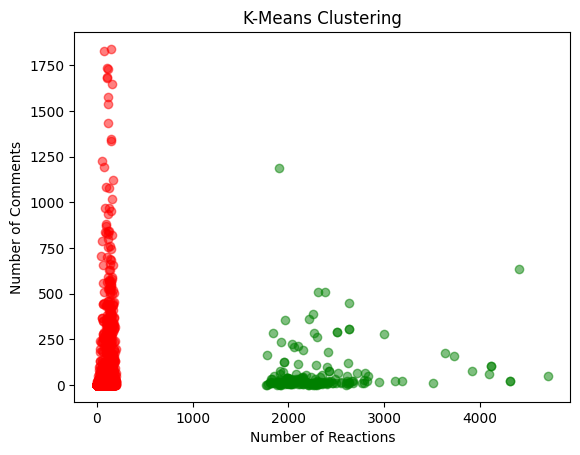